# Regression for Numeric Data

**Group members: Yifeng Lin, Yuan Zheng and Ziyang Guo**

## Introduction:  
  This is a dataset with more than 73,000 observations, each of which pertains to a particular NY State school district and associated subgroupings categorizations of high school students who had been enrolled for at least 4 years as of the end of 2018-2019 school year. In this project, we will construct and compare a series of regression models that predict the number of student "dropouts" relative o certain properties/characteristics of a given school district + associated student subgrouping.

## Data Set Attribute Description 
1. report_school_year: Indicates school year for which high school graduation info is being reported 
2. aggregation_index: Numeric code identifying manner in which high school graduation data has been aggregated 
3. aggregation_type: Text description of how high school graduation data has been aggregated 
4. nrc_code: Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district 
5. nrc_desc: Text description of the type of school district 
6. county_code: Numeric code for county name 
7. county_name: Full name of applicable NY State county 
8. nyc_ind: Indicates whether or not the school district resides within the borders of NYC 
9. membership_desc: Indicates school year in which students first enrolled in High School 
10. subgroup_code: Numeric code identifying student subgrouping 
11. subgroup_name: Text description of student subgrouping. Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.) 
12. enroll_cnt: How many students of the indicated subgrouping were enrolled during the given school year 
13. grad_cnt: How many enrolled students of the indicated subgrouping graduated at the end of the given school year 
14. grad_pct: What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year 
15. local_cnt: How many enrolled students of the indicated subgrouping were awarded a "Local" diploma 
16. local_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma 
17. reg_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma 
18. reg_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma 
19. reg_adv_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma 
20. reg_adv_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma 
21. non_diploma_credential_cnt: How many enrolled students of the indicated subgrouping achieved a non-diploma credential 
22. non_diploma_credential_pct: What percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential 
23. still_enrolled_cnt: How many enrolled students of the indicated subgrouping did not graduate but were still_enrolled 
24. still_enrolled_pct: What percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled 
25. ged_cnt: How many enrolled students of the indicated subgrouping were awarded a "GED" diploma 
26. ged_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma 
27. dropout_cnt: How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year 
28. dropout_pct: What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year 

In [15]:
# load the pandas & numpy libraries and matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/Destiny-G1997/DAV-6150/main/Project1_Data.csv')
data.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%


## Exploratory Data Analysis

In [17]:
data.shape

(73152, 29)

In [18]:
data['subgroup_name'].drop_duplicates()

0                           All Students
1                                 Female
2                                   Male
3          American Indian/Alaska Native
4                                  Black
5                               Hispanic
6                 Asian/Pacific Islander
7                                  White
8                            Multiracial
9             General Education Students
10            Students with Disabilities
11          Not English Language Learner
12              English Language Learner
13     Formerly English Language Learner
14            Economically Disadvantaged
15        Not Economically Disadvantaged
16                               Migrant
17                           Not Migrant
18                              Homeless
19                          Not Homeless
20                    Not in Foster Care
21            Parent Not in Armed Forces
573                       In Foster Care
575               Parent in Armed Forces
Name: subgroup_n

In [19]:
#separate categorical data and numerical data
df1=data[data['subgroup_name']=='All Students']
df2=df1.iloc[:,12:]
df3=df1.iloc[:,:12]
df2

,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,658,464,71%,63,10%,310,47%,91,14%,16,2%,30,5%,0,0%,148,22%
22,678,474,70%,64,9%,309,46%,101,15%,14,2%,43,6%,7,1%,140,21%
44,704,452,64%,44,6%,295,42%,113,16%,7,1%,123,17%,7,1%,115,16%
66,678,482,71%,65,10%,316,47%,101,15%,14,2%,35,5%,7,1%,140,21%
88,704,476,68%,50,7%,313,44%,113,16%,7,1%,99,14%,7,1%,115,16%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73074,49,42,86%,8,16%,27,55%,7,14%,2,4%,1,2%,0,0%,4,8%
73090,59,48,81%,8,14%,36,61%,4,7%,2,3%,5,8%,0,0%,4,7%
73105,49,43,88%,9,18%,27,55%,7,14%,2,4%,0,0%,0,0%,4,8%
73121,59,48,81%,8,14%,36,61%,4,7%,2,3%,5,8%,0,0%,4,7%


In [20]:
# find out how many missing value
df2[df2['enroll_cnt']=='-'].shape

(28, 17)

we find that there are some none value '-', so we need to drop them

In [21]:
# drop missing value
df2 = df2.drop(df2[df2['enroll_cnt']=='-'].index)
df2

,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,658,464,71%,63,10%,310,47%,91,14%,16,2%,30,5%,0,0%,148,22%
22,678,474,70%,64,9%,309,46%,101,15%,14,2%,43,6%,7,1%,140,21%
44,704,452,64%,44,6%,295,42%,113,16%,7,1%,123,17%,7,1%,115,16%
66,678,482,71%,65,10%,316,47%,101,15%,14,2%,35,5%,7,1%,140,21%
88,704,476,68%,50,7%,313,44%,113,16%,7,1%,99,14%,7,1%,115,16%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73074,49,42,86%,8,16%,27,55%,7,14%,2,4%,1,2%,0,0%,4,8%
73090,59,48,81%,8,14%,36,61%,4,7%,2,3%,5,8%,0,0%,4,7%
73105,49,43,88%,9,18%,27,55%,7,14%,2,4%,0,0%,0,0%,4,8%
73121,59,48,81%,8,14%,36,61%,4,7%,2,3%,5,8%,0,0%,4,7%


In [22]:
# drop value of '-' 
df2['grad_pct']=df2['grad_pct'].str.strip("%").astype(float)/100;
df2['local_pct']=df2['local_pct'].str.strip("%").astype(float)/100;
df2['reg_pct']=df2['reg_pct'].str.strip("%").astype(float)/100;
df2['reg_adv_pct']=df2['reg_adv_pct'].str.strip("%").astype(float)/100;
df2['non_diploma_credential_pct']=df2['non_diploma_credential_pct'].str.strip("%").astype(float)/100;
df2['still_enr_pct']=df2['still_enr_pct'].str.strip("%").astype(float)/100;
df2['ged_pct']=df2['ged_pct'].str.strip("%").astype(float)/100;
df2['dropout_pct']=df2['dropout_pct'].str.strip("%").astype(float)/100;


In [23]:
# transform the object to float
df2['enroll_cnt']=df2['enroll_cnt'].astype(float)
df2['grad_cnt']=df2['grad_cnt'].astype(float)
df2['local_cnt']=df2['local_cnt'].astype(float)
df2['reg_cnt']=df2['reg_cnt'].astype(float)
df2['reg_adv_cnt']=df2['reg_adv_cnt'].astype(float)
df2['non_diploma_credential_cnt']=df2['non_diploma_credential_cnt'].astype(float)
df2['still_enr_cnt']=df2['still_enr_cnt'].astype(float)
df2['ged_cnt']=df2['ged_cnt'].astype(float)
df2['dropout_cnt']=df2['dropout_cnt'].astype(float)

In [24]:
df2.dtypes

enroll_cnt                    float64
grad_cnt                      float64
grad_pct                      float64
local_cnt                     float64
local_pct                     float64
reg_cnt                       float64
reg_pct                       float64
reg_adv_cnt                   float64
reg_adv_pct                   float64
non_diploma_credential_cnt    float64
non_diploma_credential_pct    float64
still_enr_cnt                 float64
still_enr_pct                 float64
ged_cnt                       float64
ged_pct                       float64
dropout_cnt                   float64
dropout_pct                   float64
dtype: object

There are some duplicates columns and too many complicated counties without meaning to do research, so we are going to drop them.

In [7]:
df3=df3.drop(df3.columns[[0,1,2,3,6,7,9,10,11]],axis=1,inplace=False) 
df3

,nrc_code,nrc_desc,nyc_ind
0,3,Urban-Suburban High Needs,0
22,3,Urban-Suburban High Needs,0
44,3,Urban-Suburban High Needs,0
66,3,Urban-Suburban High Needs,0
88,3,Urban-Suburban High Needs,0
...,...,...,...
73074,4,Rural High Needs,0
73090,4,Rural High Needs,0
73105,4,Rural High Needs,0
73121,4,Rural High Needs,0


In [8]:
# turn the name of each columns into list
column2=df2.columns.to_list()
column3=df3.columns.to_list()

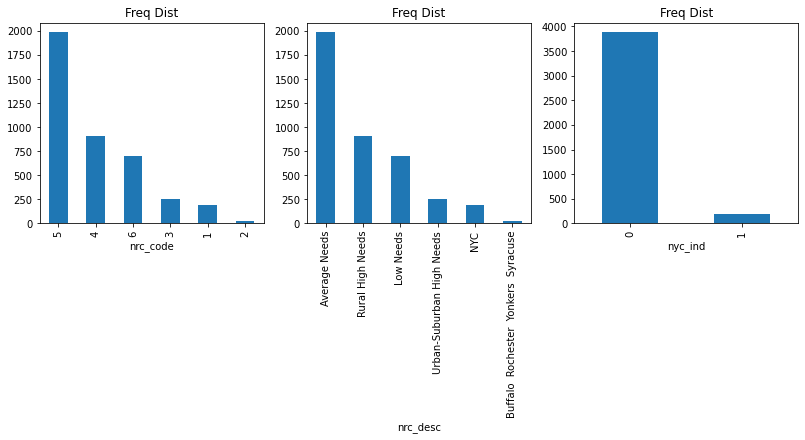

In [10]:
# show barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(15,15))
for i in range(3):
    plt.subplot(3,4,i+1)
    df3[column3[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column3[i])
plt.tight_layout()

As shown in the above chart, we know that the type of school district mostly gathered at the 'Average Needs', the 'Buffalo Rochester Yonkers Syracuse is the least. As for the index of 'nyc_ind', we know that most school district not located in New York, and only nearly a liitle part of school resides within the borders of NYC. 

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass t

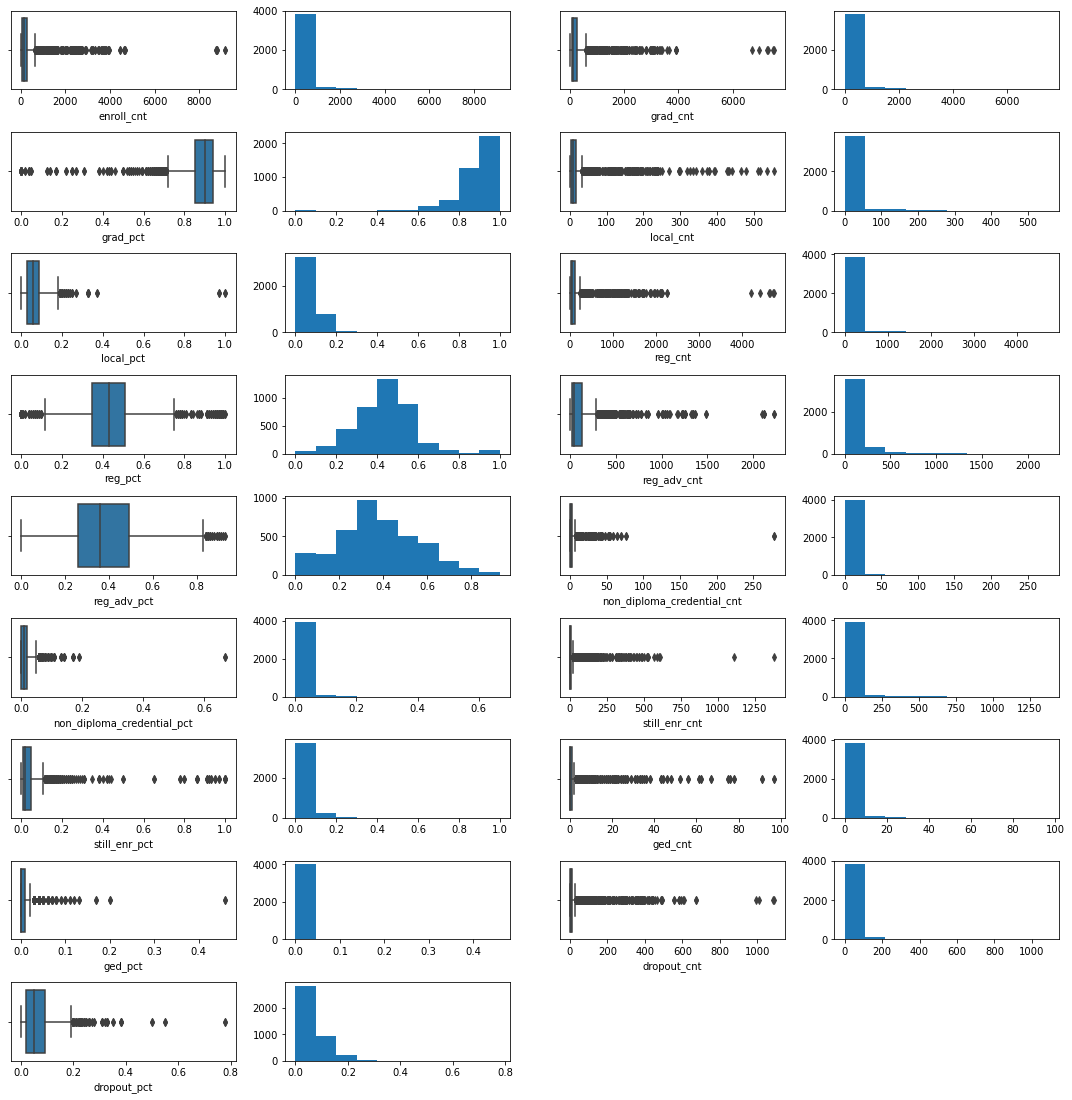

In [25]:
fig=plt.figure(figsize=(15,20))
for i in range(17):
    n=2*i
    plt.subplot(12,4,n+1)
    sns.boxplot(df2[column2[i]])
    plt.subplot(12,4,n+2)
    plt.hist(df2[column2[i]])
    
plt.tight_layout()

According to the above histograms and boxplots, we found that most columns are gathered at the smaller value bins, and some attributes like 'reg_pct' and 'reg_adv_pct' nearly conform to the normal distribution. As for the column 'grad_pct', we can judge from its box plot and histogram that its value gathered at a high value, which means at the end of the given school year, the enrolled students of the indicated subgrouping graduated to take a big part of the whole students. The 'dropout_pct' is the response variable in this project and most value is about between 0 and 0.1, no more than 0.2. also, there exists some outlier which means there are some school has high drop out rate.

In [26]:
# draw a heatmap to show the correlation between response variable and other variables
def draw_heatmap(data):
    ylabels = data.columns.values.tolist()


    df = pd.DataFrame(data)

    dfData = df.corr()
    plt.subplots(figsize=(15, 15)) 
    sns.heatmap(dfData, annot=True, vmax=1, square=True,yticklabels=ylabels,xticklabels=ylabels, cmap="RdBu") 
    plt.show()

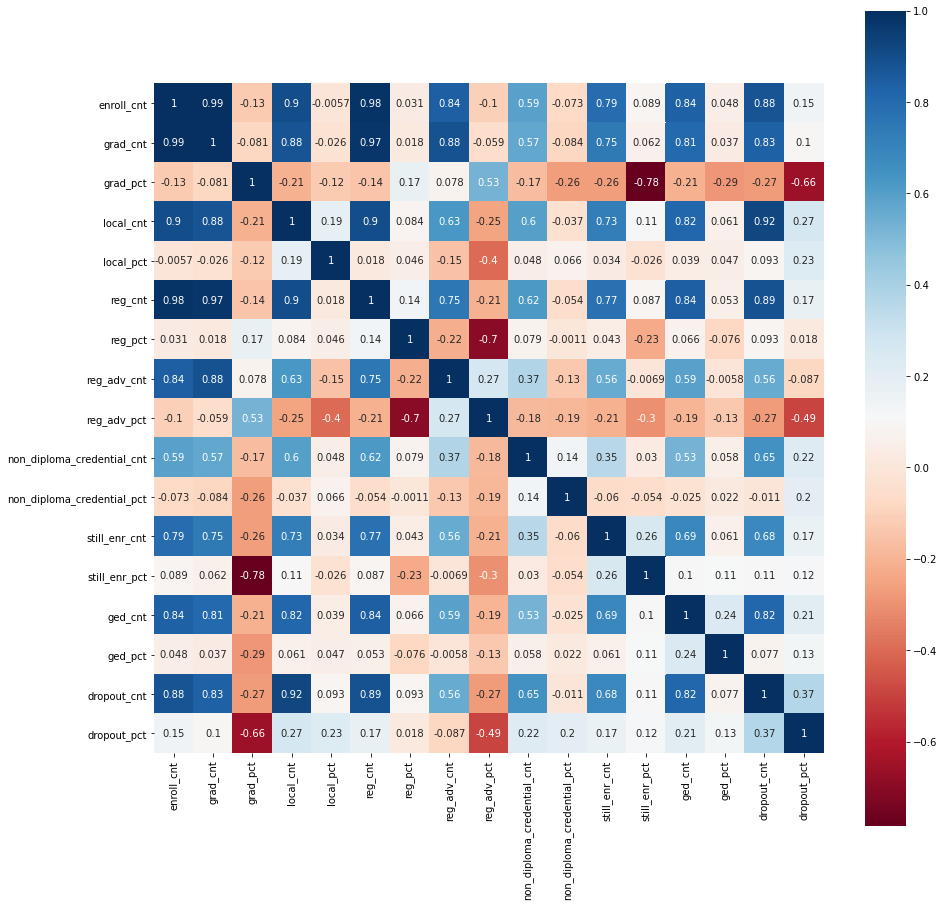

In [27]:
draw_heatmap(df2)

As shown in the above heat map, we can see that the 'grad_pct' and 'reg_adv_pct' have a significant negative correlation between these two variables and the response variable. And the 'reg_cnt' and 'reg_adv_cnt' might be not so siginificant to the response variable.

## Data Preparation & Feature selection

According to the result of the EDA of the dataset, we can see that there are a lot of outliers from each attribute's boxplot. So, in the data preparation, we use box cox functions to reduce the outliers and finish normalization. And also based on the correlation plot we can see the "enroll_cnt", "grad_cnt", "local_cnt", "reg_cnt", "reg_adv_cnt", "non_diploma_credential_cnt", "still_enr_cnt", and "ged_cnt" have high correlations with "dropout_cnt". So we will apply box cox to these attributes.  

In [15]:
# Load boxcox function from scipy.stats
from scipy.stats import boxcox
from scipy import stats

In [16]:
df4 = df2[['enroll_cnt','grad_cnt','local_cnt','reg_cnt','reg_adv_cnt','non_diploma_credential_cnt','still_enr_cnt','ged_cnt','dropout_cnt']]
df4

,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,658.0,464.0,63.0,310.0,91.0,16.0,30.0,0.0,148.0
22,678.0,474.0,64.0,309.0,101.0,14.0,43.0,7.0,140.0
44,704.0,452.0,44.0,295.0,113.0,7.0,123.0,7.0,115.0
66,678.0,482.0,65.0,316.0,101.0,14.0,35.0,7.0,140.0
88,704.0,476.0,50.0,313.0,113.0,7.0,99.0,7.0,115.0
...,...,...,...,...,...,...,...,...,...
73074,49.0,42.0,8.0,27.0,7.0,2.0,1.0,0.0,4.0
73090,59.0,48.0,8.0,36.0,4.0,2.0,5.0,0.0,4.0
73105,49.0,43.0,9.0,27.0,7.0,2.0,0.0,0.0,4.0
73121,59.0,48.0,8.0,36.0,4.0,2.0,5.0,0.0,4.0


In [17]:
df4.describe()

,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
count,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000
mean,301.044488,255.102076,18.878398,134.154474,102.069204,3.043500,16.592684,2.073406,24.062284
std,612.179829,493.166413,44.837198,307.564129,175.361315,8.933269,59.184918,7.080976,72.517240
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,57.000000,3.000000,27.000000,18.000000,0.000000,1.000000,0.000000,2.000000
50%,128.000000,115.500000,7.000000,52.000000,43.000000,1.000000,3.000000,0.000000,5.000000
75%,295.000000,271.000000,15.000000,113.000000,126.000000,3.000000,8.000000,1.000000,13.000000
max,9176.000000,7540.000000,557.000000,4752.000000,2231.000000,279.000000,1381.000000,97.000000,1091.000000


In [18]:
# First we remove all the 0 values
df4 = df4 + 1

In [19]:
df4.describe()

,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
count,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000
mean,302.044488,256.102076,19.878398,135.154474,103.069204,4.043500,17.592684,3.073406,25.062284
std,612.179829,493.166413,44.837198,307.564129,175.361315,8.933269,59.184918,7.080976,72.517240
min,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,65.000000,58.000000,4.000000,28.000000,19.000000,1.000000,2.000000,1.000000,3.000000
50%,129.000000,116.500000,8.000000,53.000000,44.000000,2.000000,4.000000,1.000000,6.000000
75%,296.000000,272.000000,16.000000,114.000000,127.000000,4.000000,9.000000,2.000000,14.000000
max,9177.000000,7541.000000,558.000000,4753.000000,2232.000000,280.000000,1382.000000,98.000000,1092.000000


In [20]:
# using boxcox to deal with some outliers and finish normalization
x1 = df4.enroll_cnt
y1, fixed_x1 = stats.boxcox(x1)
df4['enroll_cnt'] = pd.DataFrame(y1)

x2 = df4.grad_cnt
y2, fixed_x2 = stats.boxcox(x2)
df4['grad_cnt'] = pd.DataFrame(y2)

x3 = df4.local_cnt
y3, fixed_x3 = stats.boxcox(x3)
df4['local_cnt'] = pd.DataFrame(y3)

x4 = df4.reg_cnt
y4, fixed_x4 = stats.boxcox(x4)
df4['reg_cnt'] = pd.DataFrame(y4)

x5 = df4.reg_adv_cnt
y5, fixed_x5 = stats.boxcox(x5)
df4['reg_adv_cnt'] = pd.DataFrame(y5)

x6 = df4.non_diploma_credential_cnt
y6, fixed_x6 = stats.boxcox(x6)
df4['non_diploma_credential_cnt'] = pd.DataFrame(y6)

x7 = df4.still_enr_cnt
y7, fixed_x7 = stats.boxcox(x7)
df4['still_enr_cnt'] = pd.DataFrame(y7)

x8 = df4.ged_cnt
y8, fixed_x8 = stats.boxcox(x8)
df4['ged_cnt'] = pd.DataFrame(y8)
# check the result
df4

,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,4.965242,6.651381,3.064226,5.014061,5.473430,1.521906,2.084108,0.0,149.0
22,4.086324,5.251582,2.210943,3.729124,4.955482,0.586591,1.448657,0.0,141.0
44,2.676243,2.873381,1.247296,2.179376,1.468110,0.000000,1.119770,0.0,116.0
66,3.226671,3.895868,0.000000,2.744991,3.575178,0.847075,0.621692,0.0,141.0
88,2.638681,3.000021,0.657163,2.179376,2.267131,0.000000,0.000000,0.0,116.0
...,...,...,...,...,...,...,...,...,...
73074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
73090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
73105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
73121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [21]:
# load KNNImputer from sklearn.impute
from sklearn.impute import KNNImputer
# use KNN to fill missing values
KI = KNNImputer(n_neighbors = 3, weights = "uniform")
df4_transformed = KI.fit_transform(df4)
print(df4_transformed)

[[4.96524157e+00 6.65138059e+00 3.06422589e+00 ... 2.08410800e+00
  0.00000000e+00 1.49000000e+02]
 [4.08632356e+00 5.25158210e+00 2.21094274e+00 ... 1.44865708e+00
  0.00000000e+00 1.41000000e+02]
 [2.67624311e+00 2.87338090e+00 1.24729618e+00 ... 1.11976951e+00
  0.00000000e+00 1.16000000e+02]
 ...
 [3.83166227e+00 4.83041457e+00 1.85859552e+00 ... 1.33577903e+00
  3.87050530e-01 5.00000000e+00]
 [3.83166227e+00 4.83041457e+00 1.85859552e+00 ... 1.33577903e+00
  3.87050530e-01 5.00000000e+00]
 [3.43965348e+00 4.12487194e+00 1.85647247e+00 ... 1.03314737e+00
  1.39224259e-01 1.20000000e+01]]


In [22]:
df4 = pd.DataFrame(df4_transformed)
df4.columns = ['enroll_cnt','grad_cnt','local_cnt','reg_cnt','reg_adv_cnt','non_diploma_credential_cnt','still_enr_cnt','ged_cnt','dropout_cnt']

In [23]:
df4

,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,4.965242,6.651381,3.064226,5.014061,5.473430,1.521906,2.084108,0.000000,149.0
1,4.086324,5.251582,2.210943,3.729124,4.955482,0.586591,1.448657,0.000000,141.0
2,2.676243,2.873381,1.247296,2.179376,1.468110,0.000000,1.119770,0.000000,116.0
3,3.226671,3.895868,0.000000,2.744991,3.575178,0.847075,0.621692,0.000000,141.0
4,2.638681,3.000021,0.657163,2.179376,2.267131,0.000000,0.000000,0.000000,116.0
...,...,...,...,...,...,...,...,...,...
4041,3.831662,4.830415,1.858596,3.515191,4.286804,0.739214,1.335779,0.387051,5.0
4042,3.831662,4.830415,1.858596,3.515191,4.286804,0.739214,1.335779,0.387051,5.0
4043,3.831662,4.830415,1.858596,3.515191,4.286804,0.739214,1.335779,0.387051,5.0
4044,3.831662,4.830415,1.858596,3.515191,4.286804,0.739214,1.335779,0.387051,5.0


array([[<AxesSubplot:title={'center':'enroll_cnt'}>,
        <AxesSubplot:title={'center':'grad_cnt'}>,
        <AxesSubplot:title={'center':'local_cnt'}>],
       [<AxesSubplot:title={'center':'reg_cnt'}>,
        <AxesSubplot:title={'center':'reg_adv_cnt'}>,
        <AxesSubplot:title={'center':'non_diploma_credential_cnt'}>],
       [<AxesSubplot:title={'center':'still_enr_cnt'}>,
        <AxesSubplot:title={'center':'ged_cnt'}>,
        <AxesSubplot:title={'center':'dropout_cnt'}>]], dtype=object)

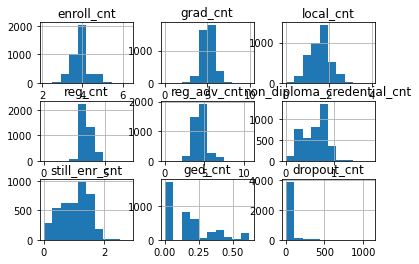

In [24]:
df4.hist()

In [25]:
df4.describe()

,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
count,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000
mean,3.898125,4.992457,1.612888,3.530265,4.546274,0.588519,1.065404,0.159776,25.062284
std,0.397356,0.711756,0.495628,0.499523,0.981239,0.269696,0.464018,0.171782,72.517240
min,2.087546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.671876,4.604335,1.240463,3.333692,3.795797,0.391060,0.746513,0.000000,3.000000
50%,3.871941,5.093280,1.677309,3.431684,4.411089,0.678128,1.059203,0.171749,6.000000
75%,4.102972,5.359925,1.900265,3.829392,5.119060,0.739214,1.395542,0.203282,14.000000
max,6.286897,9.933127,3.940611,6.901906,10.657571,1.737834,2.794696,0.620639,1092.000000


After box cox and KNN, we finished our data preparation. For attributes except for "dropout", we divide them into 2 models/groups.  
Model1: enroll_cnt, local_cnt, reg_adv_cnt, still_enr_cnt, dropout_cnt.  
Model2: grad_cnt, reg_cnt, non_diploma_credential_cnt, ged_cnt, dropout_cnt

## Regression Modeling

**Poisson Regression Model 1**

In [26]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [27]:
X1 = df4[['enroll_cnt', 'local_cnt', 'reg_adv_cnt', 'still_enr_cnt']].copy()
Y1 = df4.dropout_cnt

In [28]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.2, random_state = 12)

In [29]:
X1_train.shape, Y1_train.shape

((3236, 4), (3236,))

In [30]:
X1_test.shape, Y1_test.shape

((810, 4), (810,))

In [31]:
poisson_training_results1 = sm.GLM(Y1_train, X1_train, family=sm.families.Poisson()).fit()

In [32]:
print(poisson_training_results1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3232
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2317e+05
Date:                Sat, 23 Oct 2021   Deviance:                   2.3379e+05
Time:                        09:48:15   Pearson chi2:                 6.68e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
enroll_cnt        1.6347      0.004    416.535

According to the poisson training results summary, we can see the from 3236 observations we get 3232 DF Residuals and -1.2317e+05 Log-Likelihood for this model. The p-values are 0 which means our test is statistically significant.

**Poisson Regression Model 2**

In [33]:
X2 = df4[['grad_cnt', 'reg_cnt', 'non_diploma_credential_cnt', 'ged_cnt']].copy()
Y2 = df4.dropout_cnt

In [34]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size = 0.2, random_state = 12)

In [35]:
poisson_training_results2 = sm.GLM(Y2_train, X2_train, family=sm.families.Poisson()).fit()

In [36]:
print(poisson_training_results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3232
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68001.
Date:                Sat, 23 Oct 2021   Deviance:                   1.2346e+05
Time:                        09:48:18   Pearson chi2:                 2.32e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
grad_cnt            

According to the poisson training results summary, we can see the from 3236 observations we get 3232 DF Residuals and -68001 Log-Likelihood for this model which means the model2 is more accurate than model1. The p-values are 0 which means our test is statistically significant. 

**Negative Binomial Regression Model1**

In [37]:
nb1_training_results = sm.GLM(Y1_train, X1_train,family=sm.families.NegativeBinomial()).fit()

In [38]:
print(nb1_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3232
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13495.
Date:                Sat, 23 Oct 2021   Deviance:                       6878.2
Time:                        09:48:57   Pearson chi2:                 1.54e+04
No. Iterations:                    28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
enroll_cnt        2.2432      0.038     58.519

According to the negative binomial regression training results summary, we can see the from 3236 observations we get 3232 DF Residuals and -13495 Log-Likelihood for this model. The p-values are 0 which means our test is statistically significant. 

**Negative Binomial Regression Model2**

In [39]:
nb2_training_results = sm.GLM(Y2_train, X2_train,family=sm.families.NegativeBinomial()).fit()

In [40]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3232
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12221.
Date:                Sat, 23 Oct 2021   Deviance:                       4330.9
Time:                        09:49:05   Pearson chi2:                 1.15e+04
No. Iterations:                    44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
grad_cnt            

According to the negative binomial regression training results summary, we can see the from 3236 observations we get 3232 DF Residuals and -12221 Log-Likelihood for this model which means the model2 is more accurate than model1. The p-values are 0 which means our test is statistically significant. 

#### Multiple Linear Regression Model1

In [41]:
# concat X_train, Y_train
df5 = pd.concat([X1_train,Y1_train],axis=1)
df5

,enroll_cnt,local_cnt,reg_adv_cnt,still_enr_cnt,dropout_cnt
147,4.498994,2.165382,5.504610,1.714364,99.0
2749,3.671876,1.258117,3.863604,0.526085,2.0
1447,3.439653,1.856472,3.347527,1.033147,12.0
3080,4.658912,2.188311,6.751975,1.656023,13.0
183,4.753249,2.921236,5.969920,1.907400,12.0
...,...,...,...,...,...
3313,4.338911,2.191768,5.815485,1.395542,45.0
3325,4.290325,2.328073,5.110265,1.629944,60.0
1414,3.671876,1.258117,3.863604,0.526085,2.0
1691,3.372124,1.137559,2.651781,1.363920,21.0


In [42]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model with features
lr1 = smf.ols(formula='dropout_cnt ~ enroll_cnt + local_cnt + reg_adv_cnt + still_enr_cnt', data=df5).fit()

In [43]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:            dropout_cnt   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     27.29
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           2.60e-22
Time:                        09:49:38   Log-Likelihood:                -18422.
No. Observations:                3236   AIC:                         3.685e+04
Df Residuals:                    3231   BIC:                         3.688e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       107.4314     17.987      5.973

For the coefficients in the above summary, we can see that 'enroll_cnt', 'local_cnt', 'reg_adv_cnt' and 'dropout_cnt' are negatively correlated, 'still_enr_cnt' and 'dropout_cnt' are positively correlated and 'still_enr_cnt''s coefficient is higher than others.

#### Multiple Linear Regression Model2

In [44]:
# concat X_train, Y_train
df6 = pd.concat([X2_train,Y2_train],axis=1)
df6

,grad_cnt,reg_cnt,non_diploma_credential_cnt,ged_cnt,dropout_cnt
147,5.916945,4.402669,1.248354,0.613278,99.0
2749,4.604335,3.418428,0.707443,0.203282,2.0
1447,4.124872,2.769814,0.847075,0.139224,12.0
3080,6.409878,4.398919,0.899331,0.470000,13.0
183,6.504298,4.796872,1.002582,0.574654,12.0
...,...,...,...,...,...
3313,5.795252,4.024412,0.195530,0.000000,45.0
3325,5.648814,4.170024,0.477888,0.000000,60.0
1414,4.604335,3.418428,0.707443,0.203282,2.0
1691,3.051053,2.209168,0.678128,0.000000,21.0


In [45]:
# create a fitted model with features
lr2 = smf.ols(formula='dropout_cnt ~ grad_cnt + reg_cnt + non_diploma_credential_cnt + ged_cnt', data=df6).fit()

In [46]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:            dropout_cnt   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     191.9
Date:                Sat, 23 Oct 2021   Prob (F-statistic):          8.27e-148
Time:                        09:49:41   Log-Likelihood:                -18131.
No. Observations:                3236   AIC:                         3.627e+04
Df Residuals:                    3231   BIC:                         3.630e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

For the coefficients in the above summary, we can see that 'grad_cnt', 'ged_cnt' and 'dropout_cnt' are negatively correlated, 'still_enr_cnt', 'non_diploma_credential_cnt' and 'dropout_cnt' are positively correlated and 'ged_cnt' has the highest correlation.

## Select Models

### Select a Preferred Model

In [47]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:            dropout_cnt   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     27.29
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           2.60e-22
Time:                        09:49:42   Log-Likelihood:                -18422.
No. Observations:                3236   AIC:                         3.685e+04
Df Residuals:                    3231   BIC:                         3.688e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       107.4314     17.987      5.973

In [147]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:            dropout_cnt   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     191.9
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          8.27e-148
Time:                        17:47:52   Log-Likelihood:                -18131.
No. Observations:                3236   AIC:                         3.627e+04
Df Residuals:                    3231   BIC:                         3.630e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

For the two multiple linear regression model, we can see that R^2 of multiple linear regression model 2 is higher than multiple linear regression model 1, so the multiple linear regression model 2 fits better than multiple linear regression model 1.

In [148]:
print(poisson_training_results1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3232
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2317e+05
Date:                Fri, 22 Oct 2021   Deviance:                   2.3379e+05
Time:                        18:05:10   Pearson chi2:                 6.68e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
enroll_cnt        1.6347      0.004    416.535

In [151]:
print(nb1_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3232
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13495.
Date:                Fri, 22 Oct 2021   Deviance:                       6878.2
Time:                        18:20:38   Pearson chi2:                 1.54e+04
No. Iterations:                    28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
enroll_cnt        2.2432      0.038     58.519

In our case, the log-likelihood for negative binomial regression model 1 is -13495, while for the Poisson regression model 1 it is -123170. So the LR test statistic is 2 * (123170–13495) = 219350. This value is vastly greater than the critical value of χ2(1) at the 1% significance level which is 5.412.
As per the LR test, the trained negative binomial regression model 1 regression model has demonstrated a much better goodness-of-fit on the data set as compared to the Poisson regression model 1.

In [154]:
print(poisson_training_results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3232
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68001.
Date:                Fri, 22 Oct 2021   Deviance:                   1.2346e+05
Time:                        20:16:44   Pearson chi2:                 2.32e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
grad_cnt            

In [155]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                 3236
Model:                            GLM   Df Residuals:                     3232
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12221.
Date:                Fri, 22 Oct 2021   Deviance:                       4330.9
Time:                        20:16:46   Pearson chi2:                 1.15e+04
No. Iterations:                    44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
grad_cnt            

In our case, the log-likelihood for negative binomial regression model 2 is -12221, while for the Poisson regression model 2 it is -68001. So the LR test statistic is 2 * (68001–12221) = 111560. This value is vastly greater than the critical value of χ2(1) at the 1% significance level which is 5.412.
As per the LR test, the trained negative binomial regression model 2 regression model has demonstrated a much better goodness-of-fit on the data set as compared to the Poisson regression model 2.

So we have 3 better models now, negative binomial regression model 1, negative binomial regression model 2, multiple linear regression model 2. For these 3 models, the log-likelihood of negative binomial regression model 2 is higher than others, so the trained negative binomial regression model 2 regression model has demonstrated the best goodness-of-fit on the data set.

###  Apply Our Preferred Model to the Testing Subset

In [48]:
# predict on the X2_test subset
nb2_predictions = nb2_training_results.get_prediction(X2_test)

In [49]:
# change to the dataframe
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

           mean   mean_se  mean_ci_lower  mean_ci_upper
3006  19.807982  0.487611      18.874972      20.787112
322   11.074077  0.321856      10.460880      11.723217
3447  38.229771  1.194542      35.958762      40.644208
846   22.065040  0.676828      20.777571      23.432286
2901  14.667183  0.367228      13.964804      15.404889
...         ...       ...            ...            ...
3167  77.845126  3.193568      71.830881      84.362930
3085   5.667049  0.262125       5.175893       6.204812
3772   7.720240  0.389476       6.993407       8.522614
535   11.074077  0.321856      10.460880      11.723217
1616  19.807982  0.487611      18.874972      20.787112

[810 rows x 4 columns]


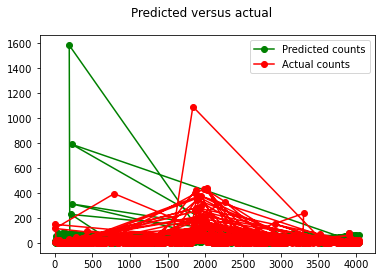

In [53]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = Y2_test
fig = plt.figure()
# give this plot a title
fig.suptitle('Predicted versus actual')
# plot the predicted line
predicted, = plt.plot(X2_test.index, predicted_counts, 'go-', label='Predicted counts')
# plot the actual line
actual, = plt.plot(X2_test.index, actual_counts, 'ro-', label='Actual counts')
# give this plot a legend
plt.legend(handles=[predicted, actual])
plt.show()

Not too bad! The NB2 model seems to be more or less tracking the trend. And in some cases, its predictions are way off the actual values.

## Conclusions

Through the above series of operations, we have selected the model(negative binomial regression model 2) with the best fit. Through testing, we found that the performance of this model is basically qualified, but the fit is not very good in some areas, so it needs to be improved.